# **Linear Regression with Human Resources dataset - Machine Learning with Python**

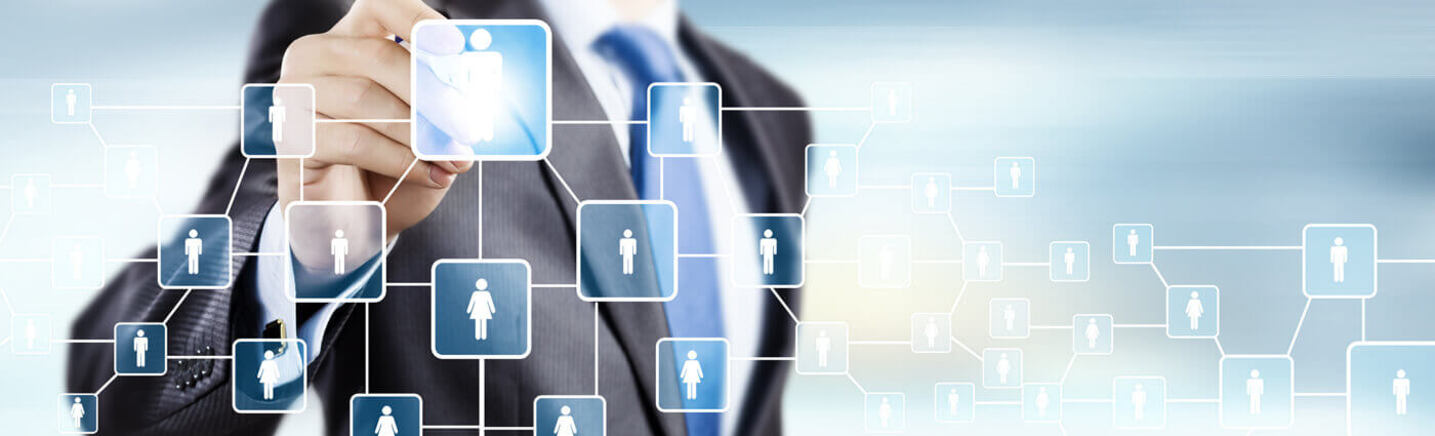

In [ ]:
import pandas as pd
import matplotlib.pyplot as plx
import seaborn as sns
import numpy as np


This is a comprehensive dataset designed to provide insights into various aspects of employee demographics, job roles, performance ratings, and employment history within an organization. This dataset captures information such as employee names, job titles, locations, genders, marital statuses, citizenship statuses, and racial/ethnic backgrounds. Additionally, it includes records of employment duration, performance ratings, methods of hiring, and reasons for termination or voluntary resignation. This multifaceted data structure is particularly useful for analyzing workforce trends, diversity, employee retention, and performance management.

Through this dataset, organizations can derive crucial insights that aid in talent management and workforce planning. By examining patterns in employee demographics and performance metrics, HR professionals can develop targeted strategies to foster a more inclusive workplace and enhance employee engagement. The dataset serves as a valuable resource for researchers and practitioners alike, facilitating predictive modeling and data-driven decision-making in human resources management. As such, the HRDataset_v14.csv stands out as a vital asset in understanding the dynamics of workforce composition and organizational effectiveness.

Link:  https://www.kaggle.com/datasets/rhuebner/human-resources-data-set/data

In [ ]:
data = pd.read_csv('/content/HRDataset_v14.csv')

In [ ]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [ ]:
data.columns = data.columns.str.strip()
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [ ]:
data.isna().sum()

,0
Employee_Name,0
EmpID,0
MarriedID,0
MaritalStatusID,0
GenderID,0
EmpStatusID,0
DeptID,0
PerfScoreID,0
FromDiversityJobFairID,0
Salary,0


In [ ]:
data.shape

(311, 36)

In [ ]:
data.drop(columns=['Employee_Name','Position','State', 'Zip', 'DOB', 'Sex',
        'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName','LastPerformanceReview_Date','RecruitmentSource',
       'PerformanceScore'],inplace=True)

In [ ]:
data.columns

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [ ]:
data

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,10026,0,0,1,1,5,4,0,62506,0,19,22.0,4.60,5,0,0,1
1,10084,1,1,1,5,3,3,0,104437,1,27,4.0,4.96,3,6,0,17
2,10196,1,1,0,5,5,3,0,64955,1,20,20.0,3.02,3,0,0,3
3,10088,1,1,0,1,5,3,0,64991,0,19,16.0,4.84,5,0,0,15
4,10069,0,2,0,5,5,3,0,50825,1,19,39.0,5.00,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,10135,0,0,1,1,5,3,0,65893,0,20,20.0,4.07,4,0,0,13
307,10301,0,0,0,5,5,1,0,48513,1,19,12.0,3.20,2,0,5,4
308,10010,0,0,0,1,3,4,0,220450,0,6,2.0,4.60,5,6,0,16
309,10043,0,0,0,1,3,3,0,89292,0,9,4.0,5.00,3,5,0,11


In [ ]:
data.corr()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
EmpID,1.000000,0.048058,-0.043851,0.035914,0.073750,0.107406,-0.691348,0.046805,-0.115319,0.092389,-0.036488,0.090236,-0.589664,-0.146967,-0.043730,0.495513,-0.025278
MarriedID,0.048058,1.000000,0.164044,-0.024199,0.085619,-0.119932,-0.058362,-0.012708,0.026165,0.077028,-0.027334,-0.094002,-0.091178,-0.126191,0.061278,0.002875,0.096086
MaritalStatusID,-0.043851,0.164044,1.000000,-0.030236,0.114630,0.012768,0.044693,0.041117,-0.070291,0.099367,0.021923,0.023065,0.033249,0.002068,-0.051093,-0.096500,0.018722
GenderID,0.035914,-0.024199,-0.030236,1.000000,-0.032440,-0.038838,-0.054915,0.031493,0.056097,-0.015741,-0.081612,-0.043218,-0.036276,-0.044603,0.087073,0.080329,-0.004577
EmpStatusID,0.073750,0.085619,0.114630,-0.032440,1.000000,0.088711,-0.071208,0.189025,-0.110912,0.948058,0.221221,0.234222,0.024305,0.010553,-0.166560,0.078318,0.091834
DeptID,0.107406,-0.119932,0.012768,-0.038838,0.088711,1.000000,-0.084811,-0.129998,-0.448132,0.065922,0.030294,0.550240,-0.094940,0.031997,-0.785101,0.124630,0.053308
PerfScoreID,-0.691348,-0.058362,0.044693,-0.054915,-0.071208,-0.084811,1.000000,0.012315,0.130903,-0.089061,0.005227,-0.060552,0.544927,0.303579,0.045677,-0.734728,0.046629
FromDiversityJobFairID,0.046805,-0.012708,0.041117,0.031493,0.189025,-0.129998,0.012315,1.000000,0.041248,0.147717,0.015085,0.007570,-0.013040,-0.034468,0.031393,0.042532,0.062640
Salary,-0.115319,0.026165,-0.070291,0.056097,-0.110912,-0.448132,0.130903,0.041248,1.000000,-0.093994,-0.130563,-0.435406,0.064966,0.062718,0.508333,-0.069443,0.082382
Termd,0.092389,0.077028,0.099367,-0.015741,0.948058,0.065922,-0.089061,0.147717,-0.093994,1.000000,0.147042,0.209113,-0.017543,-0.004732,-0.147429,0.136379,0.098274


**Performance Score of the employee**

In [ ]:
import plotly.express as px

In [ ]:
fig=px.histogram(data,x='PerfScoreID',template='plotly_dark')
fig.show()

Here’s a more concise version of the inferences:

1. The histogram shows how performance scores are distributed across categories.
2. A peak around certain values indicates most employees have similar performance ratings.
3. High peaks at larger `PerfScoreID` values suggest many employees meet or exceed expectations.
4. A wide spread signals diverse performance levels, with some excelling and others underperforming.
5. Any isolated bars could indicate outliers, which may need further analysis.
6. The overall shape helps assess performance management effectiveness and guide improvement efforts.

These insights support performance evaluation and strategy adjustments.

**Absence of the employee**

In [ ]:
fig=px.histogram(data,x='Absences',template='plotly_dark')
fig.show()

Here’s a more concise version of the inferences for the `Absences` histogram:

1. The histogram shows how frequently employees are absent.
2. A concentration at lower values indicates most employees have low absenteeism.
3. Peaks at specific values suggest common absenteeism levels within the organization.
4. A wide spread reflects variability in attendance, with some employees being frequently absent.
5. Isolated bars may represent outliers, requiring further analysis.
6. The overall shape helps assess attendance trends and guide workforce management strategies.

These insights can assist in refining attendance policies and addressing absenteeism issues.

**Performance v/s Salary**

In [ ]:
fig=px.violin(data,x='PerfScoreID',y='Salary',color='PerfScoreID',template='plotly_dark',box=True,title='Performance v/s Salary')
fig.show()

Here’s a more concise version of the inferences:

1. **Salary Distribution**: The violin plot shows salary distributions by `PerfScoreID`, highlighting salary variations with performance levels.

2. **Central Tendency**: Higher `PerfScoreID` is generally linked to higher salaries, indicating a correlation between performance and compensation.

3. **Salary Variability**: Wider sections of the violins suggest more employees earn those specific salaries within each performance score.

4. **Outliers**: Long tails or sharp peaks may indicate outlier salaries, either very high or very low, within performance categories.

5. **Comparative Analysis**: Higher performance scores show more concentrated salary ranges, while lower scores display greater variability.

6. **Compensation Insight**: The plot suggests effective reward for performance but may also highlight discrepancies among similarly rated employees.

**Absences v/s salary**

In [ ]:
fig=px.violin(data,x='Absences',y='Salary',color='Absences',template='plotly_dark',box=True,title='Absences v/s Salary')
fig.show()

Here are your insights on the violin plot of `Absences` versus `Salary` in a more concise format:

1. **Salary Distribution**: The plot shows salary variations by absenteeism levels.

2. **Trend with Absences**: Higher absenteeism may correlate with lower salaries, indicating a potential penalty.

3. **Salary Variability**: Wider violins at low absence levels suggest more employees earn similar salaries; narrower sections indicate fewer.

4. **Outliers**: Long tails or spikes may reveal outlier salaries needing further investigation.

5. **Absence Impact**: The data suggests that high absenteeism is linked to lower salary ranges.

6. **Management Implications**: The findings raise questions about attendance policies and their impact on salary structures.

# **What is Linear Regression?**
Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The primary goal of linear regression is to find the linear equation that best predicts the dependent variable based on the values of the independent variables. This technique assumes that there is a linear relationship between the input variables (predictors) and the output variable (response), which allows for both prediction and causal inference.

The simplest form of linear regression involves a single independent variable (simple linear regression), whereas multiple independent variables can be included in a more complex analysis (multiple linear regression). Linear regression is commonly used in various fields such as finance, economics, social sciences, and biological sciences to understand relationships and make predictions.

**Formula for Linear Regression**

The formula for a simple linear regression equation can be expressed as:

y
=
w
x
+
b


Where:  
y represents the dependent variable.


x is the independent variable.


m is the slope of the line (the coefficient that represents the change in
y for a one-unit change in
x).

b is the y-intercept (the value of
y when
x
=
0).

**Formula for Multiple Linear Regression**

The multiple linear regression, where there are multiple independent variables, the equation is extended to:

y = b 0 + b 1 x 1 + b 2 x 2 + b 3 x 3 + . . . + b n x n y=b 0​+b 1​x 1​+b 2​x 2​+b 3​x 3​+...+b n​x n​

Where:

y is the dependent variable. b 0

​is the intercept. b 1 , b 2 , … , b n b 1​,b 2​,…,b n​are the coefficients for the independent variables x 1 , x 2 , … , x n x 1​,x 2​,…,x n​.



# **RMSE**

Root Mean Square Error (RMSE) is a widely used metric to measure the differences between predicted values and the actual values in a regression analysis. It quantifies the amount of error in a model's predictions, providing insight into how well the model performs. RMSE is particularly useful because it gives more weight to larger errors due to the squaring of differences, making it sensitive to outliers.

The RMSE value is expressed in the units of the dependent variable and can be interpreted as the average distance between the predicted values and the actual values. A lower RMSE value indicates a better fit of the model to the data.

Formula : <img src="https://i.imgur.com/WCanPkA.png" width="360">

**Simple Linear Regression**

1. The independent variable as PerformanceScore and Dependent variable as Salary

In [ ]:
inputs = data[['PerfScoreID']]
targets = data.Salary

In [ ]:
inputs.shape

(311, 1)

In [ ]:
targets.shape

(311,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Model = LinearRegression()

In [ ]:
Model.fit(inputs,targets)

LinearRegression()

In [ ]:
Model.predict(np.array([[4],[3],[2],[1]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([74756.25334056, 69146.93953894, 63537.62573733, 57928.31193572])

In [ ]:
predictions=Model.predict(inputs)

In [ ]:
predictions

array([74756.25334056, 69146.93953894, 69146.93953894, 69146.93953894,
       69146.93953894, 74756.25334056, 69146.93953894, 69146.93953894,
       69146.93953894, 69146.93953894, 69146.93953894, 69146.93953894,
       74756.25334056, 69146.93953894, 69146.93953894, 69146.93953894,
       74756.25334056, 69146.93953894, 69146.93953894, 69146.93953894,
       69146.93953894, 69146.93953894, 74756.25334056, 63537.62573733,
       69146.93953894, 69146.93953894, 69146.93953894, 69146.93953894,
       69146.93953894, 69146.93953894, 69146.93953894, 69146.93953894,
       69146.93953894, 69146.93953894, 69146.93953894, 69146.93953894,
       74756.25334056, 69146.93953894, 69146.93953894, 69146.93953894,
       69146.93953894, 69146.93953894, 69146.93953894, 69146.93953894,
       69146.93953894, 69146.93953894, 69146.93953894, 69146.93953894,
       69146.93953894, 69146.93953894, 69146.93953894, 74756.25334056,
       69146.93953894, 63537.62573733, 63537.62573733, 74756.25334056,
      

In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
rmse(targets,predictions)

24900.040985197295

In [ ]:
Model.coef_

array([5609.31380161])

In [ ]:
Model.intercept_

52318.998134103764

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def try_parameters(w, b, inputs, targets, model):

    plt.figure(figsize=(10, 6))
    plt.plot(inputs, predictions, 'r', alpha=0.9)
    plt.scatter(inputs, targets, s=8, alpha=0.9)
    plt.xlabel('Absences')
    plt.ylabel('Salary')
    plt.legend(['Prediction', 'Actual'])
    plt.title('Linear Regression Model Prediction vs Actual')

    loss = np.sqrt(mean_squared_error(targets, predictions))
    print("RMSE LOSS:", loss)
    return loss

In [ ]:
inputs = data['PerfScoreID'].values
targets = data['Salary'].values

RMSE LOSS: 24900.040985197295


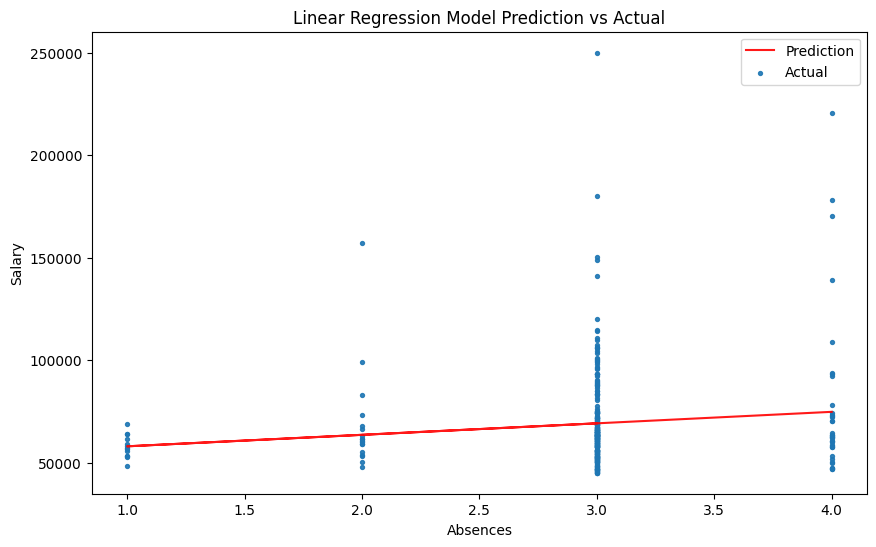

In [ ]:
loss_value = try_parameters(Model.coef_, Model.intercept_, inputs, targets, Model)
plt.show()

2. The independent variable as Absence and dependent variable as Salary

In [ ]:
inputs=data[['Absences']]
targets=data.Salary


In [ ]:
Model.fit(inputs,targets)

LinearRegression()

In [ ]:
Model.predict(np.array([[17],[1]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([71415.19174308, 65749.44466103])

In [ ]:
predictions=Model.predict(inputs)
predictions

array([65749.44466103, 71415.19174308, 66457.66304628, 70706.97335782,
       66103.55385365, 70706.97335782, 72123.41012833, 72123.41012833,
       66811.77223891, 71061.08255045, 69644.64577994, 70706.97335782,
       68582.31820205, 67874.0998168 , 65749.44466103, 72477.51932096,
       71061.08255045, 69644.64577994, 68228.20900942, 69998.75497256,
       69998.75497256, 66103.55385365, 72123.41012833, 66457.66304628,
       67165.88143154, 66103.55385365, 66811.77223891, 70352.86416519,
       67519.99062417, 70352.86416519, 68582.31820205, 71415.19174308,
       72123.41012833, 66457.66304628, 70706.97335782, 66811.77223891,
       70352.86416519, 66457.66304628, 70352.86416519, 67874.0998168 ,
       67874.0998168 , 69290.53658731, 68228.20900942, 69290.53658731,
       66811.77223891, 71415.19174308, 66457.66304628, 66457.66304628,
       66103.55385365, 68582.31820205, 67519.99062417, 67165.88143154,
       66457.66304628, 71061.08255045, 66457.66304628, 70706.97335782,
      

In [ ]:
rmse(targets,predictions)

25030.785086371106

In [ ]:
Model.intercept_

65395.33546839797

In [ ]:
Model.coef_

array([354.10919263])

In [ ]:
inputs = data['Absences'].values
targets = data['Salary'].values

RMSE LOSS: 25030.785086371106


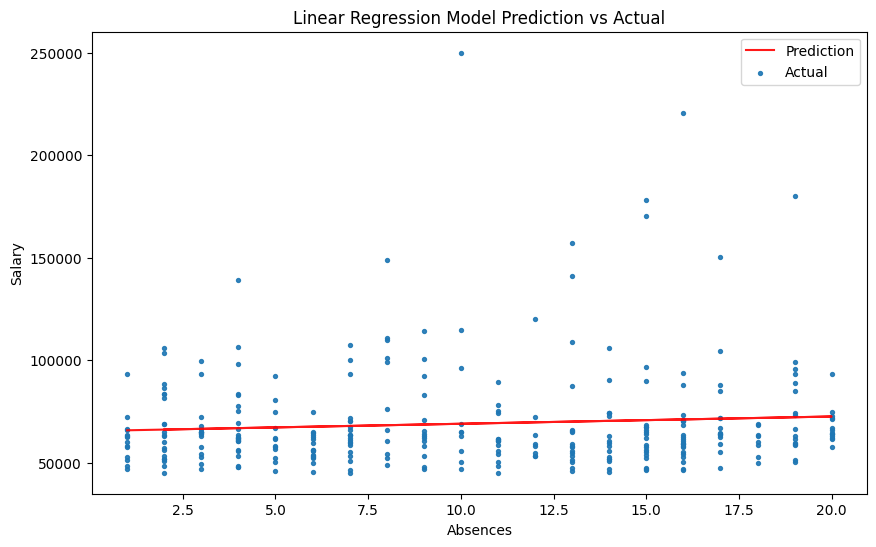

In [ ]:
loss_value = try_parameters(Model.coef_, Model.intercept_, inputs, targets, Model)
plt.show()




1. The independent variable is Absences and PerformanceScore and dependent variable is Salary

In [ ]:
inputs = data[['Absences','PerfScoreID']]
targets=data.Salary

In [ ]:
inputs.head()

,Absences,PerfScoreID
0,1,4
1,17,3
2,3,3
3,15,3
4,2,3


In [ ]:
Model.fit(inputs,targets)

LinearRegression()

In [ ]:
Predictions= Model.predict(inputs)

In [ ]:
rmse(targets,predictions)

25030.785086371106

In [ ]:
Model.coef_

array([ 328.58707872, 5456.57045209])

In [ ]:
Model.intercept_

49409.73473543508

**Polynomial Linear Regression**

In [ ]:
inputs = data[['MarriedID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID',
       'PositionID', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences']]


In [ ]:
targets=data['Salary']

In [ ]:
Model.fit(inputs,targets)

LinearRegression()

In [ ]:
predictions=Model.predict(inputs)

In [ ]:
rmse(targets,predictions)

21087.352462572846

In [ ]:
Model.intercept_

55105.755260827005

In [ ]:
Model.coef_

array([ -512.99228735,   658.12521209,  -362.73088811, -3531.40963903,
        7587.20282605,  -221.48809546,   602.05155774,  4066.20166658,
        2341.33096506,   376.64643881])